In [22]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### MNIST

In [23]:
from keras.datasets import mnist

In [24]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [25]:
X_train.shape

(60000, 28, 28)

In [26]:
X_test.shape

(10000, 28, 28)

In [34]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

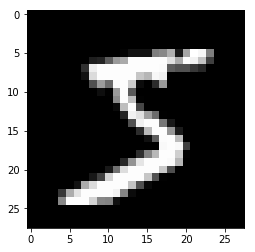

In [35]:
plt.imshow(X_train[0], cmap='gray')

In [9]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [10]:
X_train.shape

(60000, 784)

In [11]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [12]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [13]:
from keras.utils.np_utils import to_categorical

In [14]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [15]:
y_train[0]

5

In [16]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_train_cat.shape

(60000, 10)

In [18]:
y_test_cat.shape

(10000, 10)

In [36]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.models import Sequential

In [37]:
img = misc.ascent()

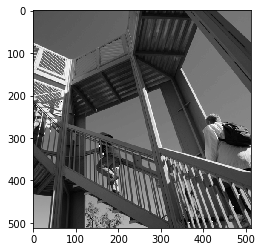

In [38]:
plt.imshow(img, cmap='gray')

In [39]:
from keras.layers import Conv2D

In [40]:
img_tensor = img.reshape((1, 512, 512, 1))

In [48]:
model = Sequential()
model.add(Conv2D(3, (3, 3), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 510, 510, 3)       30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [49]:
from keras.layers import Flatten, Activation

In [50]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

NameError: name 'K' is not defined